In [30]:
import json
import matplotlib.pyplot as plt

log_path = '/root/sf2-workspace/sf2-env/sf2/models/64_nodes_decay_normal_10000_ep/log/log.txt'

with open(log_path) as f:
    logs = f.readlines()

def is_json(val):
    try:
      json_object = json.loads(val)
    except ValueError as e:
      return False
    return True

log_list = []
for log in logs:
    if is_json(log):
        log_list.append(json.loads(log))

episodes = [l['episode'] for l in log_list]
rewards = [l['reward'] for l in log_list]
losses = [l['loss'] for l in log_list]



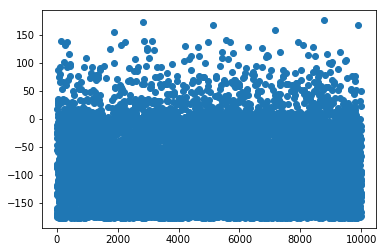

In [31]:
plt.scatter(episodes, rewards)
plt.show()

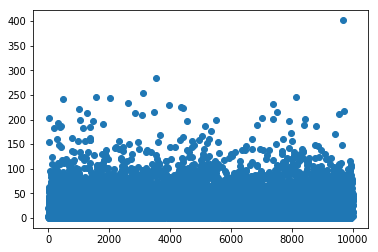

In [32]:
plt.scatter(episodes, losses)
plt.show()

In [33]:
import pandas as pd
df = pd.DataFrame.from_records(log_list)

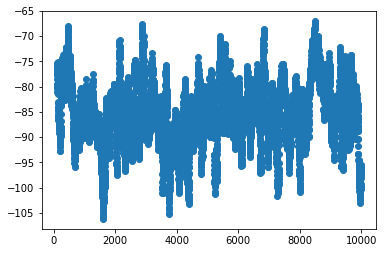

In [34]:
reward_means = df['reward'].rolling(100).mean().tolist()

plt.scatter(episodes, reward_means)
plt.show()

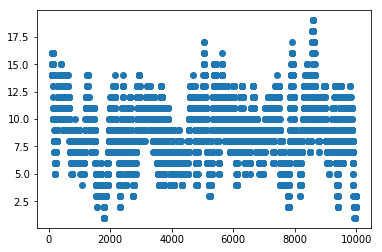

In [35]:
# win percentage

win_percentage = df['result'].transform(lambda x: 1 if x == 'win' else 0).rolling(100).sum().tolist()

plt.scatter(episodes, win_percentage)
plt.show()